![Cabec%CC%A7alho_notebook.png](cabecalho_notebook.png)

# Classificação de Atividade Humana com PCA

Vamos trabalhar com a base da demonstração feita em aula, mas vamos explorar um pouco melhor como é o desempenho da árvore variando o número de componentes principais.

In [1]:
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

filename_features = "C:/Users/feldb/Documents/EBAC/Tarefas/Modulo 27/Dados/UCI HAR Dataset/features.txt"
filename_labels = "C:/Users/feldb/Documents/EBAC/Tarefas/Modulo 27/Dados/UCI HAR Dataset/activity_labels.txt"

filename_subtrain = "C:/Users/feldb/Documents/EBAC/Tarefas/Modulo 27/Dados/UCI HAR Dataset/train/subject_train.txt"
filename_xtrain = "C:/Users/feldb/Documents/EBAC/Tarefas/Modulo 27/Dados/UCI HAR Dataset/train/X_train.txt"
filename_ytrain = "C:/Users/feldb/Documents/EBAC/Tarefas/Modulo 27/Dados/UCI HAR Dataset/train/y_train.txt"

filename_subtest = "C:/Users/feldb/Documents/EBAC/Tarefas/Modulo 27/Dados/UCI HAR Dataset/test/subject_test.txt"
ffilename_xtest = "C:/Users/feldb/Documents/EBAC/Tarefas/Modulo 27/Dados/UCI HAR Dataset/test/X_test.txt"
filename_ytest = "C:/Users/feldb/Documents/EBAC/Tarefas/Modulo 27/Dados/UCI HAR Dataset/test/y_test.txt"

features = pd.read_csv(filename_features, header=None, names=['nome_var'], squeeze=True, sep="#")
labels = pd.read_csv(filename_labels, delim_whitespace=True, header=None, names=['cod_label', 'label'])

subject_train = pd.read_csv(filename_subtrain, header=None, names=['subject_id'], squeeze=True)
X_train = pd.read_csv(filename_xtrain, delim_whitespace=True, header=None, names=features.tolist())
y_train = pd.read_csv(filename_ytrain, header=None, names=['cod_label'])

features = pd.read_csv(filename_features, header=None, names=['nome_var'], squeeze=True, sep="#")
labels = pd.read_csv(filename_labels, delim_whitespace=True, header=None, names=['cod_label', 'label'])

subject_train = pd.read_csv(filename_subtrain, header=None, names=['subject_id'], squeeze=True)
X_train = pd.read_csv(filename_xtrain, delim_whitespace=True, header=None, names=features.tolist())
y_train = pd.read_csv(filename_ytrain, header=None, names=['cod_label'])

subject_test = pd.read_csv(filename_subtest, header=None, names=['subject_id'], squeeze=True)
X_test = pd.read_csv(ffilename_xtest, delim_whitespace=True, header=None, names=features.tolist())
y_test = pd.read_csv(filename_ytest, header=None, names=['cod_label'])

C:\Users\feldb\AppData\Local\Temp\ipykernel_9680\652898678.py:29: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  features = pd.read_csv(filename_features, header=None, names=['nome_var'], squeeze=True, sep="#")
C:\Users\feldb\AppData\Local\Temp\ipykernel_9680\652898678.py:32: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  subject_train = pd.read_csv(filename_subtrain, header=None, names=['subject_id'], squeeze=True)
C:\Users\feldb\AppData\Local\Temp\ipykernel_9680\652898678.py:36: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  features = pd.read_csv(filename_features, header=None, names=['nome_var'], squeeze=True, sep="#")
C:\Users\feldb\AppData\Local\Temp\ipykernel_9680\65289

## PCA com variáveis padronizadas

Reflexão sobre a escala das variáveis:

**Variáveis em métricas muito diferentes** podem interferir na análise de componentes principais. Lembra que variância é informação pra nós? Pois bem, tipicamente se há uma variável monetária como salário, vai ter uma ordem de variabilidade bem maior que número de filhos, tempo de emprego ou qualquer variável dummy. Assim, as variáveis de maior variância tendem a "dominar" a análise. Nesses casos é comum usar a padronização das variáveis.

Faça duas análises de componentes principais para a base do HAR - com e sem padronização e compare:

- A variância explicada por componente. **R. Vide gráfico;**
- A variância explicada acumulada por componente. **R. Vide gráfico;**
- A variância percentual por componente. **R. Vide gráfico;**
- A variância percentual acumulada por componente. **R. Vide gráfico;**
- Quantas componentes você escolheria, em cada caso para explicar 90% da variância? **R. Em torno de 70 componentes.**

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

In [3]:
%%time
pca = PCA()

n_componentes = X_train.shape[1]

princomp = pca.fit(X_train)

componentes = princomp.transform(X_train)

nomes_pca = ['CP'+str(x+1) for x in list(range(n_componentes))]

Wall time: 528 ms


In [4]:
%%time
princomp.explained_variance_ratio_.cumsum()

Wall time: 0 ns


array([0.62792664, 0.67593763, 0.7175381 , 0.73583837, 0.75263628,
       0.76552179, 0.77711565, 0.78780138, 0.79756165, 0.8061646 ,
       0.81367644, 0.82047004, 0.82630114, 0.83183666, 0.83670961,
       0.84145719, 0.84613924, 0.85051971, 0.8547645 , 0.85886228,
       0.86281763, 0.86653539, 0.87005565, 0.87341938, 0.87668584,
       0.8799027 , 0.8829199 , 0.88588562, 0.88878164, 0.89161405,
       0.89433897, 0.89690847, 0.89945605, 0.90178698, 0.90406073,
       0.90630299, 0.90851929, 0.91065534, 0.91272215, 0.91474934,
       0.91667306, 0.91854244, 0.92034875, 0.92213991, 0.92383029,
       0.92544788, 0.92703453, 0.92856233, 0.93007656, 0.9315765 ,
       0.93303144, 0.93442301, 0.93577078, 0.93703989, 0.93830555,
       0.93949599, 0.94067613, 0.94182731, 0.94296236, 0.94406427,
       0.94513326, 0.94616579, 0.94719429, 0.94821805, 0.94919691,
       0.95015357, 0.9510975 , 0.95200316, 0.95290054, 0.9537642 ,
       0.95461074, 0.95544214, 0.9562501 , 0.95705162, 0.95784

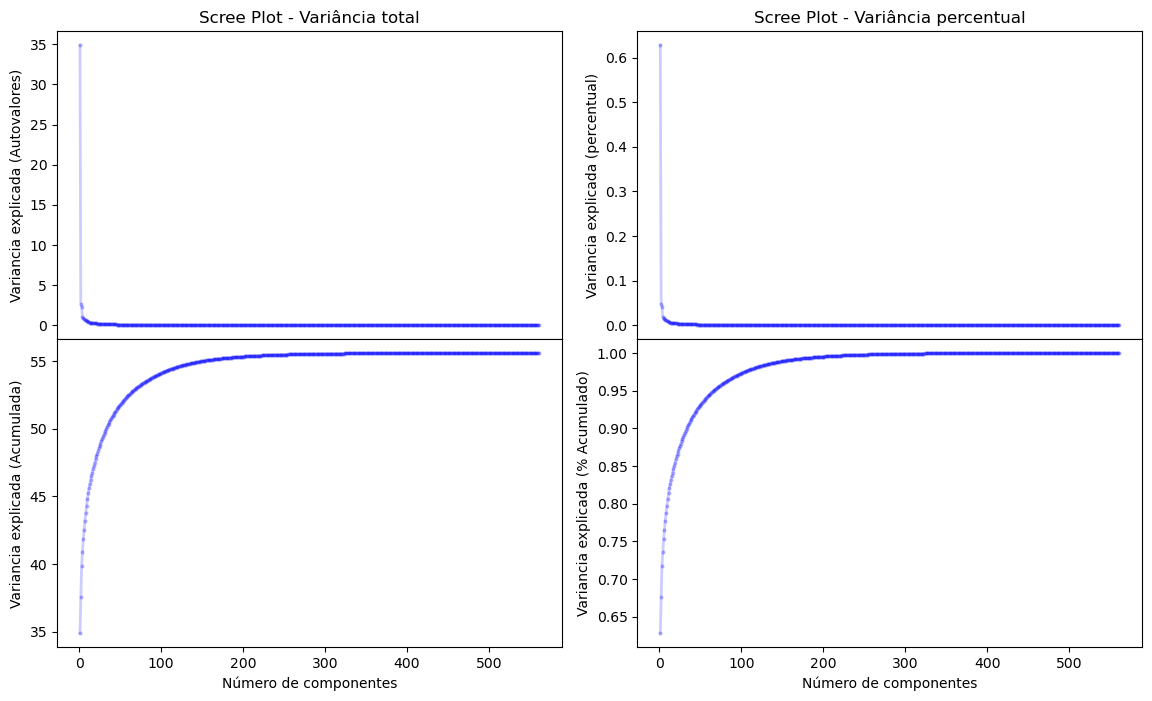

Wall time: 470 ms


In [5]:
%%time
fig, ax = plt.subplots(2, 2, sharex=True, figsize=(14, 8))
plt.subplots_adjust(hspace=0, wspace=.15)

ampli_y1 = princomp.explained_variance_[0]

num_componentes = np.arange(princomp.n_components_) + 1
ax[0,0].plot(num_componentes, princomp.explained_variance_, 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
ax[0,0].set_title('Scree Plot - Variância total')
ax[0,0].set_xlabel('Número de componentes')
ax[0,0].set_ylabel('Variancia explicada (Autovalores)')

ax[1,0].plot(num_componentes, princomp.explained_variance_.cumsum(), 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
ax[1,0].set_xlabel('Número de componentes')
ax[1,0].set_ylabel('Variancia explicada (Acumulada)')


ampli_y2 = princomp.explained_variance_ratio_[0]
# ax[1].set_ylim(-ampli_y2*.05, ampli_y2*1.1)

ax[0,1].plot(num_componentes, princomp.explained_variance_ratio_, 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
ax[0,1].set_title('Scree Plot - Variância percentual')
ax[0,1].set_xlabel('Número de componentes')
ax[0,1].set_ylabel('Variancia explicada (percentual)')

ax[1,1].plot(num_componentes, princomp.explained_variance_ratio_.cumsum(), 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
ax[1,1].set_xlabel('Número de componentes')
ax[1,1].set_ylabel('Variancia explicada (% Acumulado)')

plt.show()

In [6]:
%%time

def padroniza(s):
    if s.std() > 0:
        s = (s - s.mean())/s.std()
    return s

X_train_pad = pd.DataFrame(X_train).apply(padroniza, axis=0)
X_test_pad = pd.DataFrame(X_test).apply(padroniza, axis=0)
y_train_pad = pd.DataFrame(y_train).apply(padroniza, axis=0)
y_test_pad = pd.DataFrame(y_test).apply(padroniza, axis=0)

Wall time: 249 ms


In [7]:
%%time
pca = PCA()

n_componentes = X_train_pad.shape[1]

princomp = pca.fit(X_train_pad)

componentes = princomp.transform(X_train_pad)

nomes_pca = ['CP'+str(x+1) for x in list(range(n_componentes))]

Wall time: 247 ms


In [8]:
%%time
princomp.explained_variance_ratio_.cumsum()

Wall time: 0 ns


array([0.51101101, 0.57529982, 0.60263174, 0.62793807, 0.64642885,
       0.66362834, 0.67683124, 0.68876244, 0.69893249, 0.70877107,
       0.71726348, 0.72524995, 0.7328875 , 0.73939483, 0.7457911 ,
       0.75187631, 0.75770638, 0.76349707, 0.76912937, 0.77438823,
       0.77945402, 0.78439165, 0.78920123, 0.79379898, 0.79831499,
       0.8026006 , 0.80677828, 0.81077768, 0.81472596, 0.81863207,
       0.8223198 , 0.82588451, 0.8293215 , 0.83268124, 0.83597603,
       0.83923569, 0.84224425, 0.84520246, 0.84809944, 0.85091644,
       0.8536373 , 0.856286  , 0.85890111, 0.86146489, 0.86395496,
       0.8664127 , 0.86877146, 0.87110704, 0.8733987 , 0.8756191 ,
       0.87780333, 0.87997512, 0.88209138, 0.88414168, 0.88616518,
       0.88814187, 0.89009412, 0.89199868, 0.89389026, 0.89571958,
       0.8975201 , 0.89930467, 0.90105543, 0.90279684, 0.90448819,
       0.90614938, 0.90779624, 0.90943201, 0.91102014, 0.91259281,
       0.91413825, 0.91564151, 0.91712498, 0.91857533, 0.92000

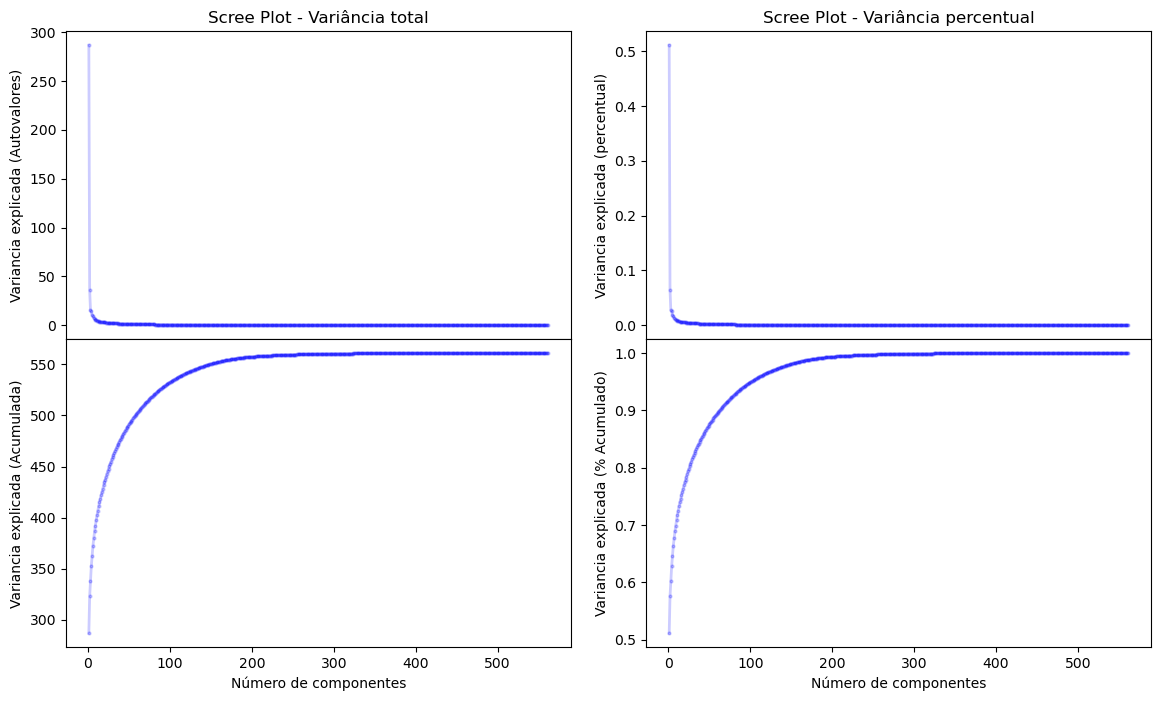

Wall time: 365 ms


In [9]:
%%time
fig, ax = plt.subplots(2, 2, sharex=True, figsize=(14, 8))
plt.subplots_adjust(hspace=0, wspace=.15)

ampli_y1 = princomp.explained_variance_[0]

num_componentes = np.arange(princomp.n_components_) + 1
ax[0,0].plot(num_componentes, princomp.explained_variance_, 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
ax[0,0].set_title('Scree Plot - Variância total')
ax[0,0].set_xlabel('Número de componentes')
ax[0,0].set_ylabel('Variancia explicada (Autovalores)')

ax[1,0].plot(num_componentes, princomp.explained_variance_.cumsum(), 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
ax[1,0].set_xlabel('Número de componentes')
ax[1,0].set_ylabel('Variancia explicada (Acumulada)')

ampli_y2 = princomp.explained_variance_ratio_[0]
# ax[1].set_ylim(-ampli_y2*.05, ampli_y2*1.1)

ax[0,1].plot(num_componentes, princomp.explained_variance_ratio_, 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
ax[0,1].set_title('Scree Plot - Variância percentual')
ax[0,1].set_xlabel('Número de componentes')
ax[0,1].set_ylabel('Variancia explicada (percentual)')

ax[1,1].plot(num_componentes, princomp.explained_variance_ratio_.cumsum(), 'o-', linewidth=2, color='blue', markersize=2, alpha=.2)
ax[1,1].set_xlabel('Número de componentes')
ax[1,1].set_ylabel('Variancia explicada (% Acumulado)')

plt.show()

## Árvore com PCA

Faça duas uma árvore de decisão com 10 componentes principais - uma com base em dados padronizados e outra sem padronizar. Utilize o ```ccp_alpha=0.001```.

Compare a acurácia na base de treino e teste.

In [14]:
prcomp = PCA(n_components=10).fit(X_train)

pc_train = prcomp.transform(X_train)
pc_test  = prcomp.transform(X_test)

In [15]:
%%time

clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=0.001).fit(pc_train, y_train)
acc_train = clf.score(pc_train, y_train)
acc_teste = clf.score(pc_test, y_test)
print(f'Acurácia da melhor árvore na base de treino:    {acc_train*100:.1f}')
print(f'Acurácia da melhor árvore na base de teste: {acc_teste*100:.1f}')

Acurácia da melhor árvore na base de treino:    89.6
Acurácia da melhor árvore na base de teste: 86.5
Wall time: 47.2 ms


In [16]:
X_train_pad = pd.DataFrame(X_train).apply(padroniza, axis=0)
X_test_pad = pd.DataFrame(X_test).apply(padroniza, axis=0)
y_train_pad = pd.DataFrame(y_train).apply(padroniza, axis=0)
y_test_pad = pd.DataFrame(y_test).apply(padroniza, axis=0)

prcomp = PCA(n_components=10).fit(X_train)

pc_train_pad = prcomp.transform(X_train_pad)
pc_test_pad  = prcomp.transform(X_test_pad)

In [17]:
%%time

clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=0.001).fit(pc_train_pad, y_train)
acc_train = clf.score(pc_train_pad, y_train)
acc_teste = clf.score(pc_test_pad, y_test)
print(f'Acurácia da melhor árvore na base de treino:    {acc_train*100:.1f}')
print(f'Acurácia da melhor árvore na base de teste: {acc_teste*100:.1f}')

Acurácia da melhor árvore na base de treino:    89.3
Acurácia da melhor árvore na base de teste: 87.6
Wall time: 49.9 ms


**R. A acurácia foi praticamente a mesma.**